# Sampler

Using a random sample generator from a uniform distribution, generate a random sample for $\widetilde{X}(U_i)$ and plot histogram over a continuous version of the Gaussian distribution (interpolated and library given).

The sampler was created based on [Wikipedia's](https://en.wikipedia.org/wiki/Inverse_transform_sampling) article on **Inverse Transform Sampling**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stats_funcs.funcs as fs

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [3]:
mu = 0
x_0 = 1
sigma = 1

x = np.linspace(-10, 10, 100)

erf = fs.cdf(fs.gaussian, x, (mu, sigma))

x = np.linspace(0, 10, 100)

cdf = fs.cdf(fs.some_random_function, x, (x_0, sigma))

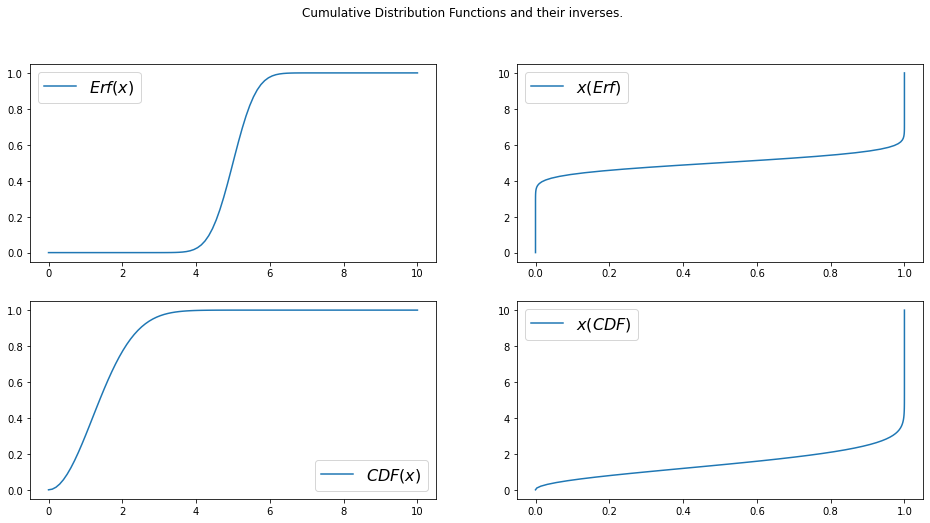

In [5]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Cumulative Distribution Functions and their inverses.')
axs[0,0].plot(x, erf, label = '$Erf(x)$')
axs[0,0].legend(prop={'size': 16})
axs[0,1].plot(erf, x, label = '$x(Erf)$')
axs[0,1].legend(prop={'size': 16})
axs[1,0].plot(x, cdf, label = '$CDF(x)$')
axs[1,0].legend(prop={'size': 16})
axs[1,1].plot(cdf, x, label = '$x(CDF)$')
axs[1,1].legend(prop={'size': 16})

The main idea behind the **Inverse Transform Sampler** is that the inverse of the **CDF** applied to a $Unif$ gives us a sample that respects the **PDF** from which the **CDF** was derived, *i.e.*

$$
CDF^{-1}(Unif(0,1)) = \{x_i\}\; \bigg |\;PDF(\{x_i\}) = \frac{\partial \;CDF(\{x_i\})}{\partial x_i}\;.
$$

To illustrate the idea, here is a gif taken from the [Wikipedia's](https://en.wikipedia.org/wiki/Inverse_transform_sampling):
<center><img src="images/Inverse_Transform_Sampling_Example.gif"/></center>
You can see, as we generate random values on the y axis, and calculate de $CDF_{-1}(y) = x(CDF)$, the resultant sample is normally distributed.

However, we do not want to solve the inverse expression analytically. The trick here is to use a set of values $\{x, CDF(x)\}^N$, and two by two generate a linear equation using the **Interpolation** of subsequent points. The following image depicts how one can find a new point given the know set of values.
<center><img src="images/interpolated point.png"/></center>
The line equation can be found using:
$$
a_i = \frac{x_{i+1} - x_i}{CDF(x_{i+1}) - CDF(x_i)}\;,\;\;b_i = x_i - a_i CDF(x_i) \;.
$$

/home/corbanez/Projects/practical_data_analysis/stats_funcs/funcs.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  a_i = (x[i+1] - x[i])/(cdf_x[i+1] - cdf_x[i])


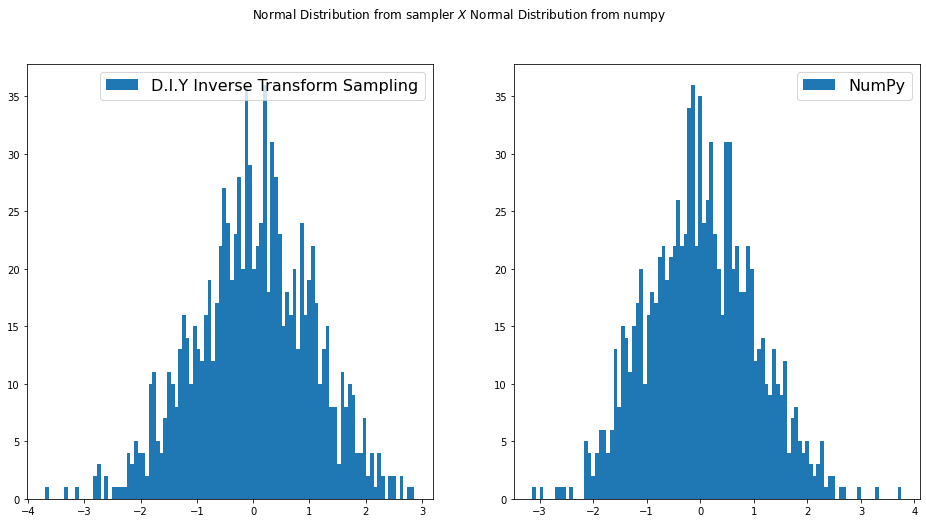

In [6]:
x = np.linspace(-10, 10, 1000)

erf = fs.cdf(fs.gaussian, x, (mu, sigma))

fig, (ax1, ax2) =plt.subplots(1, 2)
fig.suptitle('Normal Distribution from sampler $X$ Normal Distribution from numpy')
ax1.hist(fs.sampler(erf, x), 100, label = 'D.I.Y Inverse Transform Sampling')
ax2.hist(np.random.normal(mu, sigma, 1000), 100, label = 'NumPy')
ax1.legend(prop={'size': 16})
ax2.legend(prop={'size': 16})